# XGBoost: Fit/Predict

In [7]:
# Import xgboost
import xgboost as xgb
import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
import numpy as np

data = datasets.load_breast_cancer()
X= data.data
y=data.target

# Create arrays for the features and the target: X, y
#X, y = churn_data.iloc[:,:-1], churn_data.iloc[:,-1]

# Create the training and test sets
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.20, random_state=123)

# Instantiate the XGBClassifier: xg_cl
xg_cl = xgb.XGBClassifier(n_estimators=100, objective='binary:logistic', seed=123)

# Fit the classifier to the training set
xg_cl.fit(X_train,y_train)

# Predict the labels of the test set: preds
preds = xg_cl.predict(X_test)

# Compute the accuracy: accuracy
accuracy = float(np.sum(preds==y_test))/y_test.shape[0]
print("accuracy: %f" % (accuracy))


accuracy: 0.964912


# Measuring accuracy
In the previous exercise, the input datasets were converted into DMatrix data on the fly, but when you use the xgboost cv object, you have to first explicitly convert your data into a DMatrix. So, that's what you will do here before running cross-validation on churn_data.


In [9]:
# Create the DMatrix from X and y: churn_dmatrix
churn_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary: params
params = {"objective":"reg:logistic", "max_depth":3}

# Perform cross-validation: cv_results
cv_results = xgb.cv(dtrain=churn_dmatrix, params=params, 
                  nfold=3, num_boost_round=10, 
                  metrics="error", as_pandas=True, seed=123)

# Print cv_results
print(cv_results)

# Print the accuracy
print(((1-cv_results["test-error-mean"]).iloc[-1]))

   train-error-mean  train-error-std  test-error-mean  test-error-std
0          0.025480         0.002451         0.066824        0.019564
1          0.021969         0.001257         0.061524        0.013876
2          0.014945         0.006589         0.056252        0.010004
3          0.012306         0.003300         0.052734        0.011418
4          0.010549         0.004314         0.054497        0.012485
5          0.007034         0.003294         0.054497        0.016330
6          0.007034         0.003294         0.052734        0.015530
7          0.007034         0.003294         0.049216        0.013154
8          0.007034         0.003294         0.047461        0.015526
9          0.007034         0.003294         0.049216        0.008983
0.9507843333333333


## Measuring AUC

In [12]:
# Perform cross-validation: cv_results
cv_results = xgb.cv(dtrain=churn_dmatrix, params=params, 
                  nfold=3, num_boost_round=10, 
                  metrics="auc", as_pandas=True, seed=123)

# Print cv_results
print(cv_results)

# Print the accuracy
print(((cv_results["test-auc-mean"]).iloc[-1]))

   train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0        0.987225       0.001301       0.961473      0.024760
1        0.993244       0.004295       0.969078      0.022616
2        0.995224       0.003751       0.972491      0.024377
3        0.997125       0.002042       0.971354      0.025405
4        0.997610       0.001871       0.974002      0.026527
5        0.997752       0.001866       0.973470      0.026171
6        0.999064       0.000641       0.974158      0.026390
7        0.999416       0.000392       0.982509      0.014107
8        0.999519       0.000324       0.982519      0.014424
9        0.999728       0.000194       0.984928      0.011572
0.984928


# Decision trees as base learners
In this exercise, your goal is to use trees as base learners. By default, XGBoost uses trees as base learners, so you don't have to specify that you want to use trees here with booster="gbtree".

In [14]:
import sklearn.datasets as datasets
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb 


data =  datasets.load_boston()

X= data.data
y= data.target

# Create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Instantiate the XGBRegressor: xg_reg
xg_reg = xgb.XGBRegressor(objective="reg:squarederror",n_estimators=10,n_jobs=-1,seed=123)

# Fit the regressor to the training set
xg_reg.fit(X_train,y_train)

# Predict the labels of the test set: preds
preds = xg_reg.predict(X_test)

# Compute the rmse: rmse
rmse = np.sqrt(mean_squared_error(preds, y_test))
print("RMSE: %f" % (rmse))

RMSE: 3.782443


# Linear base learners
This model, although not as commonly used in XGBoost, allows you to create a regularized linear regression using XGBoost's powerful learning API. However, because it's uncommon, you have to use XGBoost's own non-scikit-learn compatible functions to build the model, such as xgb.train().

In [19]:
# Convert the training and testing sets into DMatrixes: DM_train, DM_test
DM_train = xgb.DMatrix(data=X_train,label=y_train)
DM_test =  xgb.DMatrix(data=X_test,label=y_test)

# Create the parameter dictionary: params
params = {"booster":"gblinear", "objective":"reg:squarederror"}

# Train the model: xg_reg
xg_reg = xgb.train(params = params, num_boost_round=5, dtrain=DM_train)

# Predict the labels of the test set: preds
preds = xg_reg.predict(DM_test)

# Compute and print the RMSE
rmse = np.sqrt(mean_squared_error(y_test,preds))
print("RMSE: %f" % (rmse))

RMSE: 6.631172


# Evaluating model quality

## RMSE

In [33]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary: params
params = {"objective":"reg:squarederror", "max_depth":4}

# Perform cross-validation: cv_results
cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=4, num_boost_round=100, metrics='rmse', as_pandas=True, seed=123)

# Print cv_results
print(cv_results)

# Extract and print final boosting round metric
print((cv_results["test-rmse-mean"]).tail(1))

    train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
0         17.120438        0.057830       17.151866       0.295723
1         12.353698        0.034427       12.510376       0.372386
2          9.017977        0.038795        9.245965       0.314345
3          6.690101        0.047236        7.060159       0.317659
4          5.069411        0.048644        5.571861       0.252100
..              ...             ...             ...            ...
95         0.260770        0.013028        3.279920       0.317132
96         0.255304        0.011862        3.279721       0.316943
97         0.249301        0.010414        3.281134       0.317529
98         0.246019        0.011688        3.281645       0.316757
99         0.241189        0.013354        3.281945       0.318931

[100 rows x 4 columns]
99    3.281945
Name: test-rmse-mean, dtype: float64


## MAE


In [22]:
# Perform cross-validation: cv_results
cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=4, num_boost_round=5, metrics='mae', as_pandas=True, seed=123)

# Print cv_results
print(cv_results)

# Extract and print final boosting round metric
print((cv_results["test-mae-mean"]).tail(1))

   train-mae-mean  train-mae-std  test-mae-mean  test-mae-std
0       15.584812       0.087903      15.567934      0.345122
1       11.036514       0.069404      11.044831      0.347553
2        7.827224       0.052691       7.886081      0.315104
3        5.596108       0.044331       5.718952      0.288004
4        4.062843       0.052193       4.285985      0.175467
4    4.285985
Name: test-mae-mean, dtype: float64


# Using regularization in XGBoost

In [24]:
import pandas as pd
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

reg_params = [1, 10, 100]

# Create the initial parameter dictionary for varying l2 strength: params
params = {"objective":"reg:squarederror", "max_depth":4}

# Create an empty list for storing rmses as a function of l2 complexity
rmses_l2 = []

# Iterate over reg_params
for reg in reg_params:

    # Update l2 strength
    params["lambda"] = reg
    
    # Pass this updated param dictionary into cv
    cv_results_rmse = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=2, num_boost_round=5, metrics="rmse", as_pandas=True, seed=123)
    
    # Append best rmse (final round) to rmses_l2
    rmses_l2.append(cv_results_rmse['test-rmse-mean'].tail(1).values[0])

# Look at best rmse per l2 param
print("Best rmse as a function of l2:")
print(pd.DataFrame(list(zip(reg_params, rmses_l2)), columns=["l2", "rmse"]))

Best rmse as a function of l2:
    l2       rmse
0    1   6.001886
1   10   7.216934
2  100  10.692149


# Visualizing individual XGBoost trees
Here, you will visualize individual trees from the fully boosted model that XGBoost creates using the entire housing dataset.

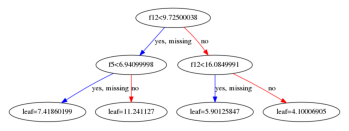

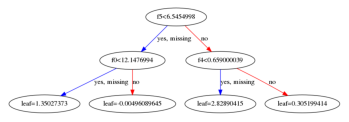

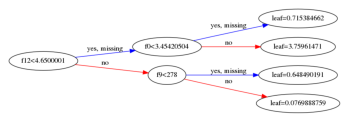

In [26]:
import matplotlib.pyplot as plt
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary: params
params = {"objective":"reg:squarederror", "max_depth":2}

# Train the model: xg_reg
xg_reg = xgb.train(params=params, dtrain=housing_dmatrix, num_boost_round=10)

# Plot the first tree
xgb.plot_tree(xg_reg,num_trees=0)
plt.show()

# Plot the fifth tree
xgb.plot_tree(xg_reg,num_trees=4)
plt.show()

# Plot the last tree sideways
xgb.plot_tree(xg_reg,num_trees=9,rankdir="LR")
plt.show()

# Visualizing feature importances: What features are most important in my dataset
One simple way of doing this involves counting the number of times each feature is split on across all boosting rounds (trees) in the model, and then visualizing the result as a bar graph, with the features ordered according to how many times they appear.

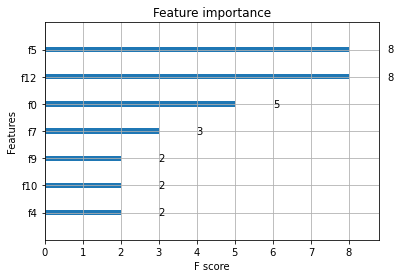

In [28]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary: params
params = params = {"objective":"reg:squarederror", "max_depth":2}

# Train the model: xg_reg
xg_reg = xgb.train(params=params, dtrain=housing_dmatrix, num_boost_round=10)


# Plot the feature importances
xgb.plot_importance(xg_reg)
plt.show()

# Tuning the number of boosting rounds

In [29]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary: params
params = {"objective":"reg:squarederror", "max_depth":3}

# Create list of number of boosting rounds
num_rounds = [5, 10, 15]

# Empty list to store final round rmse per XGBoost model
final_rmse_per_round = []

# Iterate over num_rounds and build one model per num_boost_round parameter
for curr_num_rounds in num_rounds:

    # Perform cross-validation: cv_results
    cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=3, num_boost_round=curr_num_rounds, metrics="rmse", as_pandas=True, seed=123)
    
    # Append final round RMSE
    final_rmse_per_round.append(cv_results["test-rmse-mean"].tail().values[-1])

# Print the resultant DataFrame
num_rounds_rmses = list(zip(num_rounds, final_rmse_per_round))
print(pd.DataFrame(num_rounds_rmses,columns=["num_boosting_rounds","rmse"]))

   num_boosting_rounds      rmse
0                    5  5.950357
1                   10  3.784688
2                   15  3.525731


# Automated boosting round selection using early_stopping
Early stopping works by testing the XGBoost model after every boosting round against a hold-out dataset and stopping the creation of additional boosting rounds (thereby finishing training of the model early) if the hold-out metric ("rmse" in our case) does not improve for a given number of rounds.

In [32]:
# Create your housing DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary for each tree: params
params = {"objective":"reg:squarederror", "max_depth":4}

# Perform cross-validation with early stopping: cv_results
cv_results = cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=3, num_boost_round=100, metrics="rmse", as_pandas=True, seed=123,early_stopping_rounds=10)

# Print cv_results
print((cv_results["test-rmse-mean"]).tail(1))

78    3.23685
Name: test-rmse-mean, dtype: float64


# Tuning eta
You'll begin by tuning the "eta", also known as the learning rate. The learning rate in XGBoost is a parameter that can range between 0 and 1, with higher values of "eta" penalizing feature weights more strongly, causing much stronger regularization.

In [38]:
# Create your housing DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary for each tree (boosting round)
params = {"objective":"reg:squarederror", "max_depth":4}

# Create list of eta values and empty list to store final round rmse per xgboost model
eta_vals = [0.001, 0.01, 0.1,0.2,0.3,0.4]
best_rmse = []

# Systematically vary the eta 
for curr_val in eta_vals:

    params["eta"] = curr_val
    
    # Perform cross-validation: cv_results
    cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=3, num_boost_round=100, metrics="rmse", as_pandas=True, seed=123,early_stopping_rounds=10)
    
    
    
    # Append the final round rmse to best_rmse
    best_rmse.append(cv_results["test-rmse-mean"].tail().values[-1])

# Print the resultant DataFrame
print(pd.DataFrame(list(zip(eta_vals, best_rmse)), columns=["eta","best_rmse"]))

     eta  best_rmse
0  0.001  21.748714
1  0.010   9.844723
2  0.100   3.246140
3  0.200   3.230295
4  0.300   3.236850
5  0.400   3.196187


# Tuning max_depth
```max_depth``` is the parameter that dictates the maximum depth that each tree in a boosting round can grow to. Smaller values will lead to shallower trees, and larger values to deeper trees.

In [42]:
# Create your housing DMatrix
housing_dmatrix = xgb.DMatrix(data=X,label=y)

# Create the parameter dictionary
params = {"objective":"reg:squarederror",'eta' : 0.4}

# Create list of max_depth values
max_depths = [2,3,4,5,6,7,8,10,20]
best_rmse = []

# Systematically vary the max_depth
for curr_val in max_depths:

    params["max_depth"] = curr_val
    
    # Perform cross-validation
    cv_results = cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=3, num_boost_round=100, metrics="rmse", as_pandas=True, seed=123,early_stopping_rounds=10)
    
    
    
    # Append the final round rmse to best_rmse
    best_rmse.append(cv_results["test-rmse-mean"].tail().values[-1])

# Print the resultant DataFrame
print(pd.DataFrame(list(zip(max_depths, best_rmse)),columns=["max_depth","best_rmse"]))

   max_depth  best_rmse
0          2   3.367912
1          3   3.322094
2          4   3.196187
3          5   3.317757
4          6   3.453484
5          7   3.484154
6          8   3.463143
7         10   3.450962
8         20   3.466114


# Tuning colsample_bytree
You've already seen this if you've ever worked with scikit-learn's RandomForestClassifier or RandomForestRegressor, where it just was called max_features. In both xgboost and sklearn, this parameter (although named differently) simply specifies the fraction of features to choose from at every split in a given tree. In xgboost, colsample_bytree must be specified as a float between 0 and 1.

In [45]:
# Create your housing DMatrix
housing_dmatrix = xgb.DMatrix(data=X,label=y)

# Create the parameter dictionary
params={"objective":"reg:squarederror","max_depth":4,'eta':0.4}

# Create list of hyperparameter values: colsample_bytree_vals
colsample_bytree_vals = [0.1,0.5,0.8,1]
best_rmse = []

# Systematically vary the hyperparameter value 
for curr_val in colsample_bytree_vals:

    params['colsample_bytree'] = curr_val
    
    # Perform cross-validation
    cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=3,
                 num_boost_round=100, early_stopping_rounds=10,
                 metrics="rmse", as_pandas=True, seed=123)
    
    # Append the final round rmse to best_rmse
    best_rmse.append(cv_results["test-rmse-mean"].tail().values[-1])

# Print the resultant DataFrame
print(pd.DataFrame(list(zip(colsample_bytree_vals, best_rmse)), columns=["colsample_bytree","best_rmse"]))

   colsample_bytree  best_rmse
0               0.1   4.538345
1               0.5   3.708443
2               0.8   3.386788
3               1.0   3.196187


# Grid search with XGBoost
 

In [49]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid: gbm_param_grid
gbm_param_grid = {
    'colsample_bytree': [0.3, 0.7],
    'n_estimators': [50],
    'max_depth': [2, 5]
}

# Instantiate the regressor: gbm
gbm = xgb.XGBRegressor()

# Perform grid search: grid_mse
grid_mse = GridSearchCV(estimator=gbm,param_grid=gbm_param_grid,scoring='neg_mean_squared_error',cv=4,verbose=1,n_jobs=-1)


# Fit grid_mse to the data
grid_mse.fit(X,y)

# Print the best parameters and lowest RMSE
print("Best parameters found: ", grid_mse.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(grid_mse.best_score_)))

Fitting 4 folds for each of 4 candidates, totalling 16 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
Best parameters found:  {'colsample_bytree': 0.7, 'max_depth': 2, 'n_estimators': 50}
Lowest RMSE found:  4.512687658759479
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    1.9s finished


# Random search with XGBoost
Often, GridSearchCV can be really time consuming, so in practice, you may want to use RandomizedSearchCV instead, as you will do in this exercise. 

In [51]:
from sklearn.model_selection import RandomizedSearchCV
# Create the parameter grid: gbm_param_grid 
gbm_param_grid = {
    'n_estimators': [25],
    'max_depth': range(2, 12)
}

# Instantiate the regressor: gbm
gbm = xgb.XGBRegressor(n_estimators=10)

# Perform random search: grid_mse
randomized_mse = RandomizedSearchCV(estimator=gbm,param_distributions=gbm_param_grid,scoring='neg_mean_squared_error',n_iter=5,cv=4,verbose=1,n_jobs=-1)


# Fit randomized_mse to the data
randomized_mse.fit(X,y)

# Print the best parameters and lowest RMSE
print("Best parameters found: ", randomized_mse.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(randomized_mse.best_score_)))

Fitting 4 folds for each of 5 candidates, totalling 20 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
Best parameters found:  {'n_estimators': 25, 'max_depth': 5}
Lowest RMSE found:  4.428597319082465
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    1.6s finished


# Pipelines and preprocessing

In [ ]:
/home/pitu/Documents/jupyter/pruebas/Ames housing dataset.ipynb